<a href="https://colab.research.google.com/github/wayneotemah/AI-and-ML/blob/main/data__augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exersice 2
Write a function that can shift an MNIST image in any direction
(left, right, up, or down) by one pixel.5 Then, for each image in
the training set, create four shifted copies (one per direction) and
add them to the training set. Finally, train your best model on this
expanded training set and measure its accuracy on the test set.
You should observe that your model performs even better now!
This technique of artificially growing the training set is called
data augmentation or training set expansion.

In [101]:
#import neccessary libraires 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#fetch the dataset 
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [102]:
# Split the data
X,y = mnist['data'],mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [103]:
import random
rnd = random.randrange(900)
Test_case = X_test.iloc[rnd].to_numpy()

In [104]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

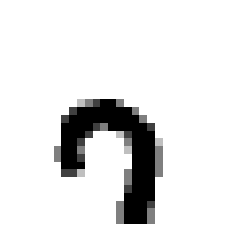

In [105]:
def shift_down(arr, step):
  #shitp down
  x = arr.reshape(28, 28)

  x = x[:-step]
  fill =  np.full((step, 28), 0)
  x = np.concatenate((fill, x))
  plt.imshow(x, cmap="binary")
  plt.axis("off")
  plt.show()
  return x
  

shift_down(Test_case,6)

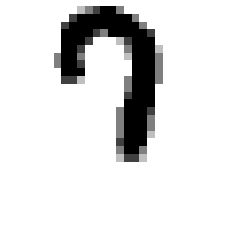

In [106]:
def shift_up(arr, step):
  #shitp down
  x = arr.reshape(28, 28)
  o = x
  #shift up
  x = arr.reshape(28, 28)
  x = x[step:]
  fill =  np.full((step, 28), 0)
  x = np.concatenate((x, fill))
  plt.imshow(x, cmap="binary")
  plt.axis("off")
  plt.show()
  return x


shift_up(Test_case,6)



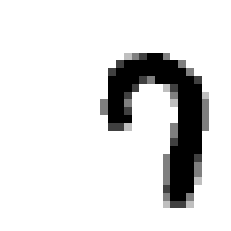

In [107]:
def shift_right(arr, step):
  x = arr.reshape(28, 28)
  o = x
  new_o = np.array([])
  for A in  o :
    fill =  np.full((step), 0)
    A = A[:-step]
    A = np.concatenate((fill,A))
    new_o = np.concatenate((new_o, A))

  
  new_o = new_o.reshape(28, 28)
  plt.imshow(new_o, cmap="binary")
  plt.axis("off")
  plt.show()
  return new_o

shift_right(Test_case,6)

22


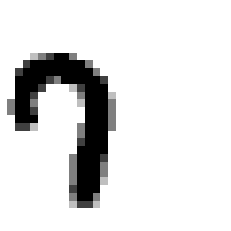

In [109]:
def shift_left(arr, step):
  o = arr.reshape(28, 28)

  left_step = (28-step)
  print(left_step)
  new_o = np.array([])
  for A in  o :
    fill =  np.full((step), 0)
    A = A[-left_step:]
    A = np.concatenate((A,fill))
    new_o = np.concatenate((new_o, A))

  new_o = new_o.reshape(28, 28)
  plt.imshow(new_o, cmap="binary")
  plt.axis("off")
  plt.show()
  return new_o

shift_left(Test_case,6)